# Подготовка

In [ ]:
!pip install pandas seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
from collections import Counter
from itertools import combinations
from collections.abc import Sequence

In [ ]:
# Цветовые палитры
CMAP = "YlGnBu"
CMAP_SEQUENTIAL = "YlGnBu"  # для последовательных данных
CMAP_DIVERGING = "RdBu_r"   # для дивергентных данных
CMAP_QUALITATIVE = "Set2"    # для категориальных данных

# Цвета для стиля
PRIMARY_COLOR = "#2E86AB"    # основной цвет
SECONDARY_COLOR = "#A23B72"  # дополнительный цвет
ACCENT_COLOR = "#F18F01"     # акцентный цвет
NEUTRAL_COLOR = "#4A4A4A"    # нейтральный цвет

# Цвета для категорий
CATEGORY_COLORS = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#3BB273", "#7768AE"]

# Размеры графиков
FIG_SIZE_SMALL = (8, 6)
FIG_SIZE_MEDIUM = (12, 8)
FIG_SIZE_LARGE = (16, 10)

# Шрифты
FONT_FAMILY = "DejaVu Sans"
FONT_SIZE_TITLE = 16
FONT_SIZE_AXES = 12
FONT_SIZE_TICKS = 10
FONT_SIZE_LEGEND = 16

# Линии и маркеры
LINE_WIDTH = 2
MARKER_SIZE = 6
GRID_ALPHA = 0.3

# Словарь параметров
PLOT_RC_PARAMS = {
    "figure.figsize": FIG_SIZE_MEDIUM,
    "font.family": FONT_FAMILY,
    "font.size": FONT_SIZE_AXES,
    "axes.titlesize": FONT_SIZE_TITLE,
    "axes.labelsize": FONT_SIZE_AXES,
    "xtick.labelsize": FONT_SIZE_TICKS,
    "ytick.labelsize": FONT_SIZE_TICKS,
    "legend.fontsize": FONT_SIZE_LEGEND,
    "grid.alpha": GRID_ALPHA,
    "lines.linewidth": LINE_WIDTH,
    "lines.markersize": MARKER_SIZE,
}

plt.rcParams.update(PLOT_RC_PARAMS)
sns.set_palette(CMAP_QUALITATIVE)

# Общие характеристики

Для начала загрузим в память датасет:

In [ ]:
df = pd.read_csv("drive/MyDrive/habr.csv", on_bad_lines='skip')

И посмотрим на базовую информацию:

In [ ]:
df.head()

,id,text,keywords,hubs,username,reading_time,title,time,status
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"['даджет', 'даджеты', 'kickstarter', 'bluetoot...","['Блог компании Даджет', 'Гаджеты']",RubyFOX,6.0,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56,ok
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"['Porsche', 'Mission E']","['Энергия и элементы питания', 'Транспорт', 'Э...",SLY_G,1.0,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20,ok
2,390013,Медики из Бостонского детского госпиталясмогли...,"['данио-рерио', 'рак', 'раковая опухоль', 'пол...",['Научно-популярное'],SLY_G,2.0,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21,ok
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"['википедия', 'нетривиальные бизнесы', 'свобод...","['Научно-популярное', 'Краудсорсинг', 'Социаль...",ssneg,2.0,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09,ok
4,390019,Генетики из исследовательской компании 23andMe...,"['совы', 'жаворонки', 'распорядок дня', 'цирка...","['Научно-популярное', 'Здоровье']",SLY_G,2.0,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36,ok


In [ ]:
df.tail()

,id,text,keywords,hubs,username,reading_time,title,time,status
151899,789998,Разработчик бесплатного проекта Nitter с откры...,"['twitter', 'nitter', 'front-end', 'open sourc...","['Open source', 'Управление проектами', 'Социа...",maybe_elf,1.0,Автор Nitter объявил о закрытии проекта из-за ...,2024-01-30 06:57:47,ok
151900,790000,Авторы коллективного иска против образовательн...,"['geekbrains', 'образовательные курсы', 'иски'...","['Учебный процесс в IT', 'Законодательство в IT']",maybe_elf,2.0,Клиенты платформы GeekBrains добились возврата...,2024-01-30 07:17:01,ok
151901,790002,Нарастание угроз утечки информации требует при...,"['dlp-системы', 'информационная безопасность',...",['Информационная безопасность'],Golub,17.0,20 DLP-систем для информационной защиты компан...,2024-01-30 07:10:09,ok
151902,790004,"Глава Neuralink Илон Маскзаявил, что компания ...","['neuralink', 'нейроинтерфейс', 'мозг', 'мозг-...","['Биотехнологии', 'Мозг', 'Здоровье', 'Будущее...",maybe_elf,1.0,Neuralink впервые вживила нейрочип в мозг чело...,2024-01-30 07:27:07,ok
151903,790006,Все главные новости из мира Joomla с момента в...,"['joomla', 'joomla статьи', 'joomla видео', 'j...","['CMS', 'Веб-разработка', 'Open source', 'PHP'...",sergeytolkachyov,33.0,Joomla-дайджест. 2-е полугодие 2023 года / Хабр,2024-02-05 08:11:13,ok


In [ ]:
df.shape

(151904, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151904 entries, 0 to 151903
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            151904 non-null  int64  
 1   text          151554 non-null  object 
 2   keywords      151904 non-null  object 
 3   hubs          151904 non-null  object 
 4   username      151471 non-null  object 
 5   reading_time  151900 non-null  float64
 6   title         151904 non-null  object 
 7   time          151904 non-null  object 
 8   status        151904 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


In [ ]:
df.describe(include="all")

,id,text,keywords,hubs,username,reading_time,title,time,status
count,151904.000000,151554,151904,151904,151471,151900.000000,151904,151904,151904
unique,NaN,151532,142122,76935,24906,NaN,151529,151593,1
top,NaN,Deleted,['черт знает что'],['Информационная безопасность'],denis-19,NaN,ТОП-3 ИБ-событий недели по версии Jet CSIRT / ...,2019-10-02 07:00:02,ok
freq,NaN,4,155,748,7707,NaN,113,4,151904
mean,586012.272922,NaN,NaN,NaN,NaN,5.951501,NaN,NaN,NaN
std,121306.958639,NaN,NaN,NaN,NaN,5.718022,NaN,NaN,NaN
min,390007.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,479351.500000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN
50%,569145.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
75%,700105.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


Посмотрим на уникальные значения:

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    if df[col].nunique() < 20:
        print(df[col].value_counts())


text: 151532 уникальных значений

keywords: 142122 уникальных значений

hubs: 76935 уникальных значений

username: 24906 уникальных значений

title: 151529 уникальных значений

time: 151593 уникальных значений

status: 1 уникальных значений
status
ok    151904
Name: count, dtype: int64


## Чистка дубликатов и пропусков

In [ ]:
df.duplicated().any()

np.False_

Дубликатов нет

In [ ]:
df.isnull().sum()

,0
id,0
text,350
keywords,0
hubs,0
username,433
reading_time,4
title,0
time,0
status,0


Почистим текста, где есть нули - они нам ни к чему

In [ ]:
cleaned_text = df[df["text"].notna()]
cleaned_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151554 entries, 0 to 151903
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            151554 non-null  int64  
 1   text          151554 non-null  object 
 2   keywords      151554 non-null  object 
 3   hubs          151554 non-null  object 
 4   username      151468 non-null  object 
 5   reading_time  151553 non-null  float64
 6   title         151554 non-null  object 
 7   time          151554 non-null  object 
 8   status        151554 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.6+ MB


## Приведение типов и чистка данных

In [ ]:
cleaned_text["status"].describe()

,status
count,151554
unique,1
top,ok
freq,151554


Удалим столбец `status`, так как в нем лишь одно значение:

In [ ]:
without_status = cleaned_text.drop(columns=["status"])
without_status.head()

,id,text,keywords,hubs,username,reading_time,title,time
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"['даджет', 'даджеты', 'kickstarter', 'bluetoot...","['Блог компании Даджет', 'Гаджеты']",RubyFOX,6.0,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"['Porsche', 'Mission E']","['Энергия и элементы питания', 'Транспорт', 'Э...",SLY_G,1.0,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20
2,390013,Медики из Бостонского детского госпиталясмогли...,"['данио-рерио', 'рак', 'раковая опухоль', 'пол...",['Научно-популярное'],SLY_G,2.0,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"['википедия', 'нетривиальные бизнесы', 'свобод...","['Научно-популярное', 'Краудсорсинг', 'Социаль...",ssneg,2.0,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09
4,390019,Генетики из исследовательской компании 23andMe...,"['совы', 'жаворонки', 'распорядок дня', 'цирка...","['Научно-популярное', 'Здоровье']",SLY_G,2.0,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36


In [ ]:
without_status["reading_time"].describe()

,reading_time
count,151553.000000
mean,5.940390
std,5.699201
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,127.000000


In [ ]:
without_status["reading_time"].isna().any()

np.True_

Внутри данного столбца хранится скорость дочитывания статьи в минутах. *float64* многовато для такого. Учитывая, что все значения лежат от 1 до 127, кастим к *uint8*. Поставим *Nan* в 0.

In [ ]:
without_status["reading_time"] = without_status["reading_time"].fillna(0).astype("uint8")

Попробуем почистить текст, может быть там есть много неинформативных данных.Посмотрим сначала на количество маленьких текстов:

In [ ]:
text_lens = without_status["text"].apply(lambda x: len(x))
text_lens.describe()

,text
count,151554.000000
mean,9286.093188
std,9974.856217
min,3.000000
25%,2862.000000
50%,6769.000000
75%,12444.000000
max,770030.000000


In [ ]:
text_lens[text_lens < 300].count()

np.int64(98)

In [ ]:
without_status["text"] = without_status["text"][text_lens > 300].astype("string")

Аналогично посмотрим на `title`:

In [ ]:
title_lens = without_status["title"].apply(lambda x: len(x))
title_lens.describe()

,title
count,151554.000000
mean,69.553671
std,24.252122
min,9.000000
25%,51.000000
50%,68.000000
75%,86.000000
max,275.000000


In [ ]:
title_lens[title_lens < 10].count()

np.int64(2)

In [ ]:
without_status["title"] = without_status["title"].astype("string")

Приведем время к нужному типу:

In [ ]:
without_status["time"] = pd.to_datetime(without_status["time"])

In [ ]:
without_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151554 entries, 0 to 151903
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            151554 non-null  int64         
 1   text          151456 non-null  string        
 2   keywords      151554 non-null  object        
 3   hubs          151554 non-null  object        
 4   username      151468 non-null  object        
 5   reading_time  151554 non-null  uint8         
 6   title         151554 non-null  string        
 7   time          151554 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3), string(2), uint8(1)
memory usage: 9.4+ MB


Преобразуем `username`:

In [ ]:
user_cast = without_status["username"].astype("string").fillna("")
user_lens = user_cast.apply(lambda x: len(x))
user_lens.describe()

,username
count,151554.000000
mean,9.012220
std,3.079903
min,0.000000
25%,7.000000
50%,8.000000
75%,11.000000
max,25.000000


In [ ]:
without_status["username"].describe()

,username
count,151468
unique,24906
top,denis-19
freq,7707


In [ ]:
without_status["username"] = without_status["username"].astype("string").fillna("")

Осталось преобразовать данные `keywords` и `hubs`:

In [ ]:
without_status["keywords"] = without_status["keywords"].apply(ast.literal_eval)
without_status["hubs"] = without_status["hubs"].apply(ast.literal_eval)

In [ ]:
without_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151554 entries, 0 to 151903
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            151554 non-null  int64         
 1   text          151456 non-null  string        
 2   keywords      151554 non-null  object        
 3   hubs          151554 non-null  object        
 4   username      151554 non-null  string        
 5   reading_time  151554 non-null  uint8         
 6   title         151554 non-null  string        
 7   time          151554 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2), string(3), uint8(1)
memory usage: 9.4+ MB


In [ ]:
cleaned = without_status

In [ ]:
cleaned.head()

,id,text,keywords,hubs,username,reading_time,title,time
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"[даджет, даджеты, kickstarter, bluetooth, ламп...","[Блог компании Даджет, Гаджеты]",RubyFOX,6,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"[Porsche, Mission E]","[Энергия и элементы питания, Транспорт, Экология]",SLY_G,1,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20
2,390013,Медики из Бостонского детского госпиталясмогли...,"[данио-рерио, рак, раковая опухоль, поля канце...",[Научно-популярное],SLY_G,2,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"[википедия, нетривиальные бизнесы, свободное з...","[Научно-популярное, Краудсорсинг, Социальные с...",ssneg,2,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09
4,390019,Генетики из исследовательской компании 23andMe...,"[совы, жаворонки, распорядок дня, циркадные ри...","[Научно-популярное, Здоровье]",SLY_G,2,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36


# Анализ хабов и кейовордов

/tmp/ipython-input-350900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="tag", x="count", data=hubs_counts_df_popular.head(20), palette="viridis")


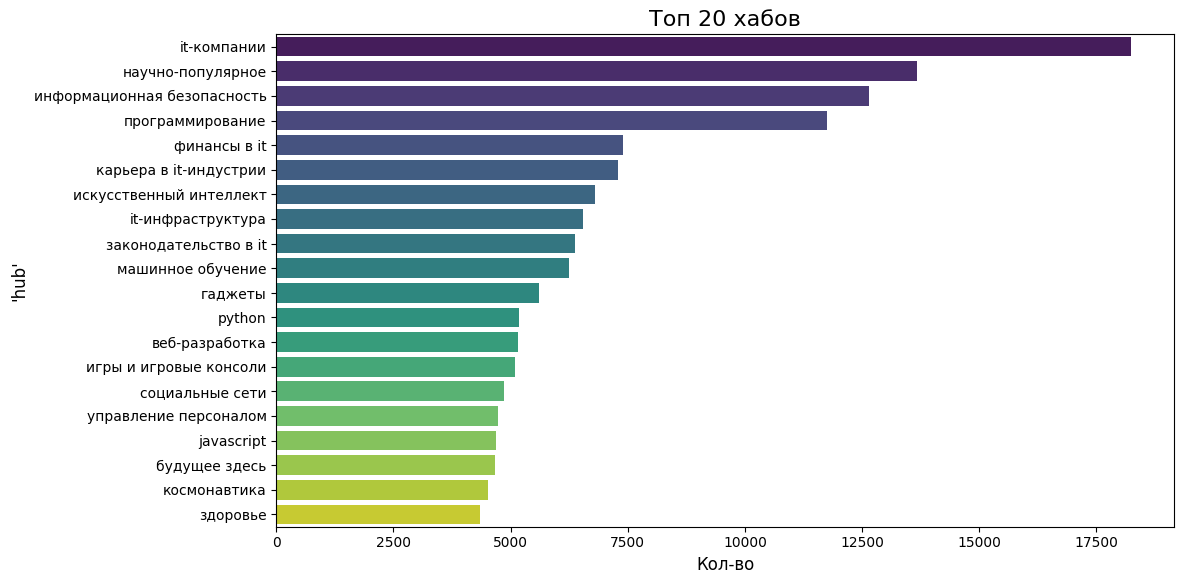

In [ ]:
all_hubs = [hub.lower() for sublist in cleaned["hubs"] for hub in sublist]
hubs_counts = Counter(all_hubs)
hubs_counts_df_popular = pd.DataFrame(hubs_counts.items(), columns=["tag", "count"]).sort_values("count", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(y="tag", x="count", data=hubs_counts_df_popular.head(20), palette="viridis")
plt.title("Топ 20 хабов")
plt.xlabel("Кол-во статей")
plt.ylabel("'hub'")
plt.tight_layout()
plt.show()

/tmp/ipython-input-4068645975.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='hub', x='count', data=hub_counts_df.head(20), palette='viridis')


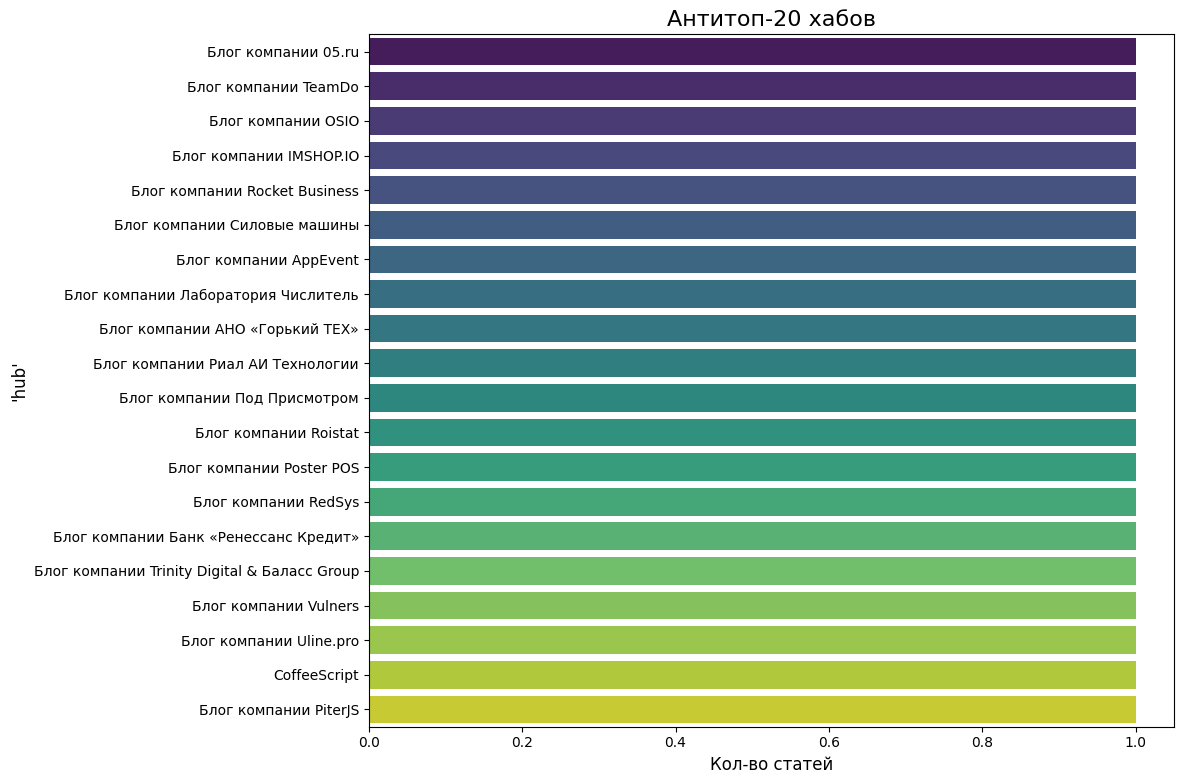

In [ ]:
hub_counts_df = pd.DataFrame(hub_counts.items(), columns=['hub', 'count']).sort_values('count', ascending=True)

plt.figure(figsize=FIG_SIZE_MEDIUM)
sns.barplot(y='hub', x='count', data=hub_counts_df.head(20), palette='viridis')
plt.title("Антитоп-20 хабов")
plt.xlabel("Кол-во статей")
plt.ylabel("'hub'")
plt.tight_layout()
plt.show()

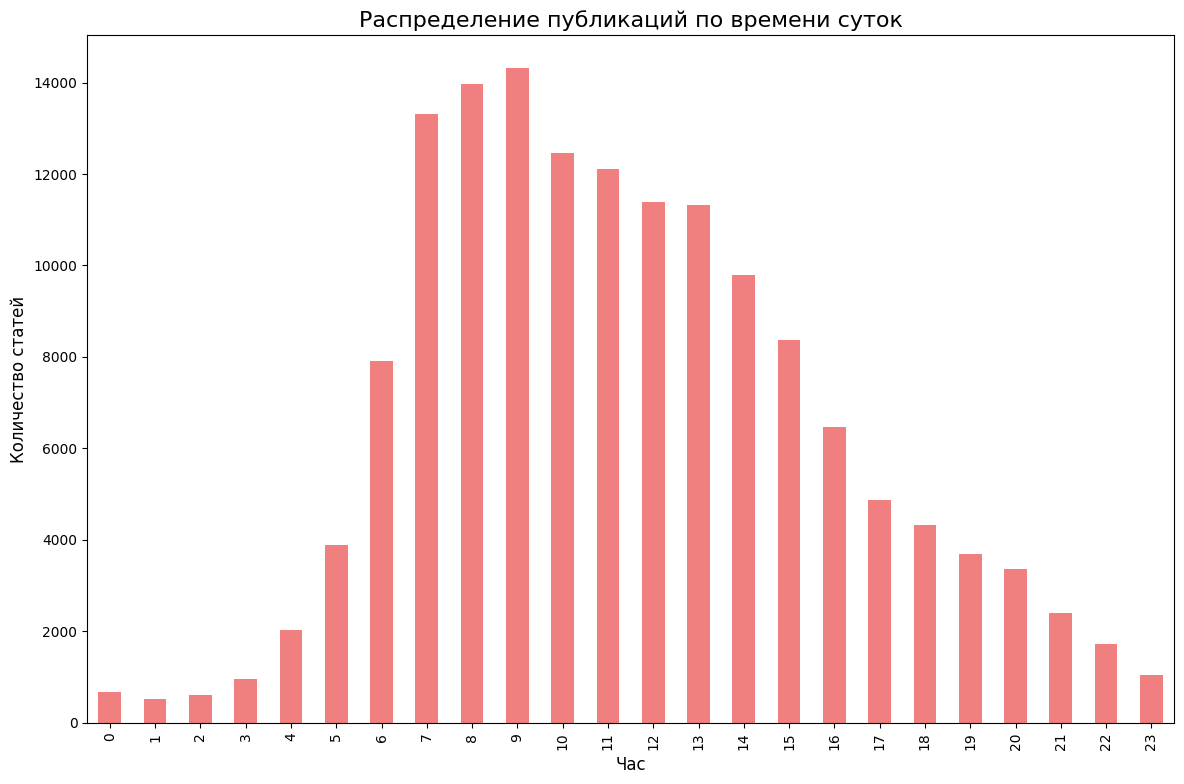

In [ ]:
hourly_posts = cleaned['time'].dt.hour.value_counts().sort_index()

plt.figure(figsize=FIG_SIZE_MEDIUM)
hourly_posts.plot(kind='bar', color='lightcoral')
plt.title('Распределение публикаций по времени суток')
plt.xlabel('Час')
plt.ylabel('Количество статей')
plt.tight_layout()
plt.show()

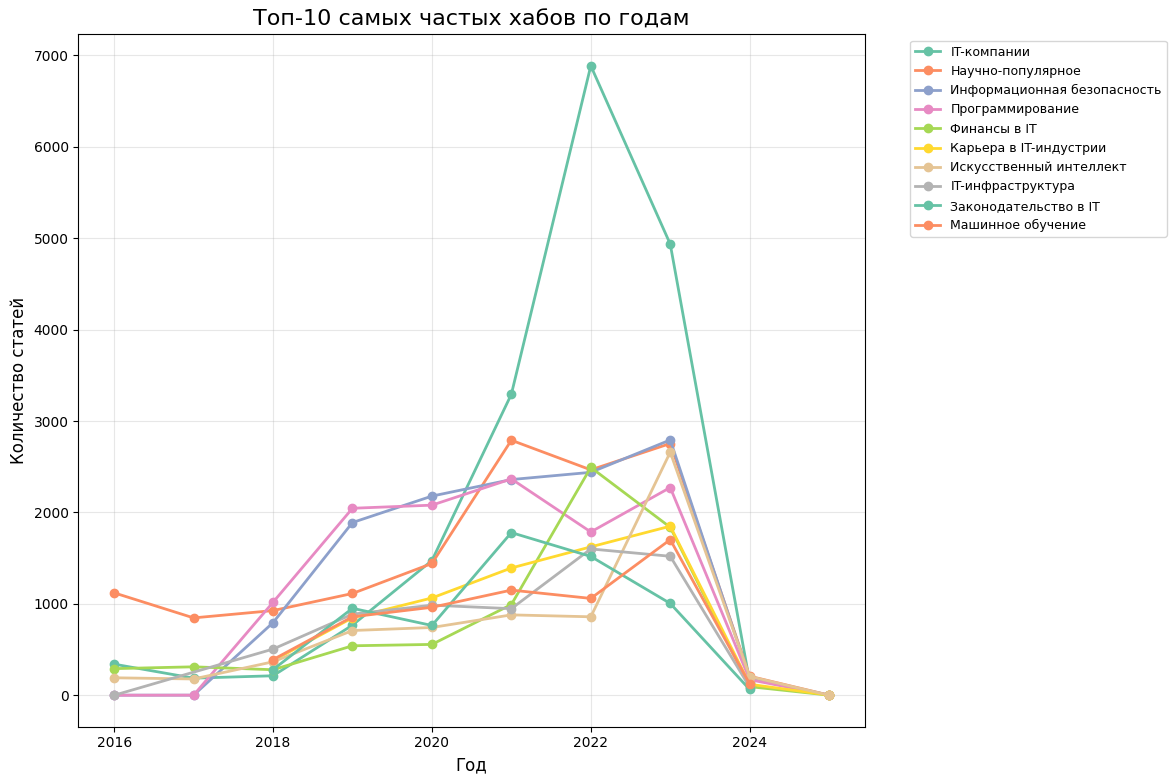

In [ ]:
cleaned["year"] = cleaned["time"].dt.year
data_exploded = cleaned.explode("hubs").copy()

tag_trend_year = (
    data_exploded
    .groupby(["year", "hubs"])
    .size()
    .reset_index(name="count")
)

top_tags = (
    tag_trend_year.groupby("hubs")["count"]
    .sum()
    .nlargest(10)
    .index
)

tag_trend_top = tag_trend_year[tag_trend_year["hubs"].isin(top_tags)]

plt.figure(figsize=FIG_SIZE_MEDIUM)
for tag in top_tags:
    subset = tag_trend_top[tag_trend_top["hubs"] == tag]
    plt.plot(subset["year"], subset["count"], label=tag, marker='o', linewidth=2)

plt.title("Топ-10 самых частых хабов по годам")
plt.xlabel("Год")
plt.ylabel("Количество статей")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

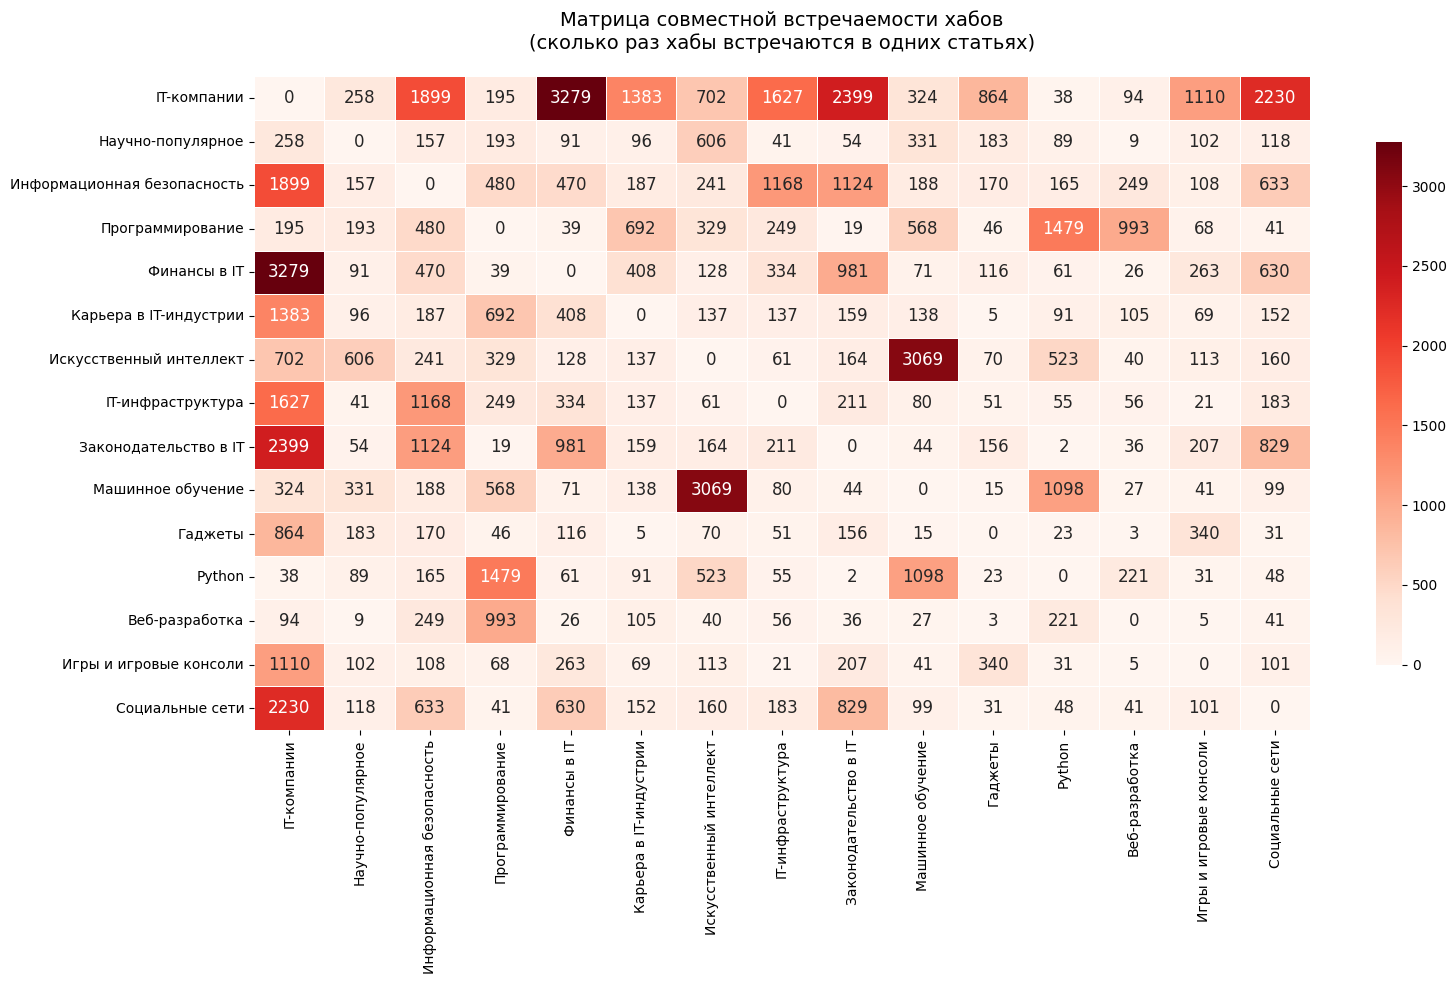

In [ ]:
top_hubs_list = [hub for hub, _ in hub_counts.most_common(15)]

cooccurrence_matrix = pd.DataFrame(0, index=top_hubs_list, columns=top_hubs_list)

for idx, row in cleaned.iterrows():
    hubs_in_article = row['hubs']
    for i, hub1 in enumerate(hubs_in_article):
        for j, hub2 in enumerate(hubs_in_article):
            if i != j and hub1 in top_hubs_list and hub2 in top_hubs_list:
                cooccurrence_matrix.loc[hub1, hub2] += 1

np.fill_diagonal(cooccurrence_matrix.values, 0)

plt.figure(figsize=FIG_SIZE_LARGE)
sns.heatmap(cooccurrence_matrix,
            annot=True,
            fmt='d',
            cmap='Reds',
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title('Матрица совместной встречаемости хабов\n(сколько раз хабы встречаются в одних статьях)',
          fontsize=14, pad=20)
plt.tight_layout()
plt.show()


А насколько вообще сильно хабы похожи на кейворды?

In [ ]:
def get_clean(seq: Sequence) -> set:
    return set([el.strip().lower() for el in seq])

isec = cleaned[["keywords", "hubs"]]
isec["isec"] = cleaned.apply(
    lambda x: get_clean(x["keywords"]) & get_clean(x["hubs"]),
    axis=1
    );
isec["sizes"] = isec["isec"].apply(len)

/tmp/ipython-input-1303291707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isec["isec"] = cleaned.apply(
/tmp/ipython-input-1303291707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isec["sizes"] = isec["isec"].apply(len)


In [ ]:
isec.tail()

,keywords,hubs,isec,sizes
151899,"[twitter, nitter, front-end, open source, соцс...","[Open source, Управление проектами, Социальные...",{open source},1
151900,"[geekbrains, образовательные курсы, иски, суды...","[Учебный процесс в IT, Законодательство в IT]",{},0
151901,"[dlp-системы, информационная безопасность, кон...",[Информационная безопасность],{информационная безопасность},1
151902,"[neuralink, нейроинтерфейс, мозг, мозг-компьют...","[Биотехнологии, Мозг, Здоровье, Будущее здесь]",{мозг},1
151903,"[joomla, joomla статьи, joomla видео, joomla д...","[CMS, Веб-разработка, Open source, PHP, Joomla]",{joomla},1


In [ ]:
isec["isec"].describe()

,isec
count,151554
unique,5421
top,{}
freq,94509


In [ ]:
isec[isec["sizes"] > 0]["isec"].describe()

,isec
count,57045
unique,5420
top,{python}
freq,1981


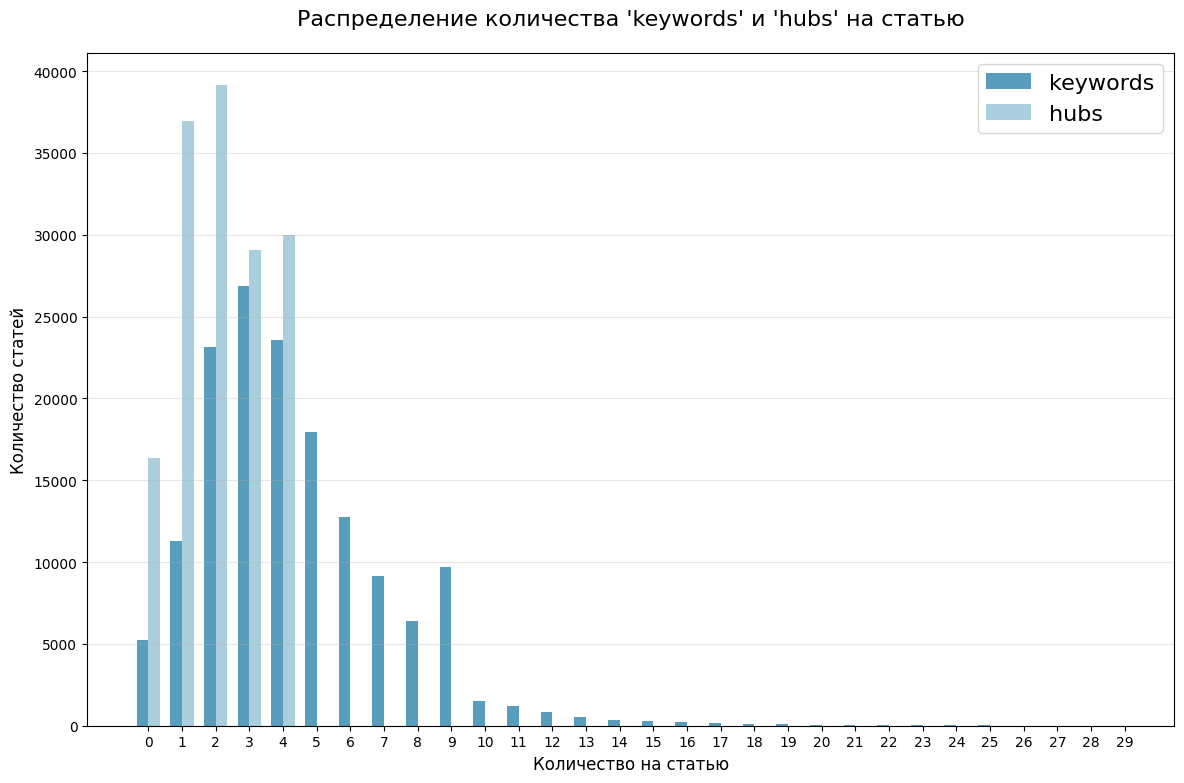

In [ ]:
def plot_keywords_hubs_distribution(isec):
    keywords_count = isec["keywords"].apply(len)
    hubs_count = isec["hubs"].apply(len)

    keywords_freq = keywords_count.value_counts().sort_index()
    hubs_freq = hubs_count.value_counts().sort_index()

    keywords_freq = keywords_freq[keywords_freq.index <= 30]
    hubs_freq = hubs_freq[hubs_freq.index <= 30]

    fig, ax = plt.subplots(figsize=FIG_SIZE_MEDIUM)

    bar_width = 0.35
    x_pos = np.arange(max(len(keywords_freq), len(hubs_freq)))

    bars1 = ax.bar(x_pos[:len(keywords_freq)] - bar_width/2, keywords_freq.values,
                   bar_width, label="keywords", color=PRIMARY_COLOR, alpha=0.8)

    bars2 = ax.bar(x_pos[:len(hubs_freq)] + bar_width/2, hubs_freq.values,
                   bar_width, label="hubs", color=PRIMARY_COLOR, alpha=0.4)

    ax.set_xlabel("Количество на статью", fontsize=FONT_SIZE_AXES)
    ax.set_ylabel("Количество статей", fontsize=FONT_SIZE_AXES)
    ax.set_title("Распределение количества 'keywords' и 'hubs' на статью",
                 fontsize=FONT_SIZE_TITLE, pad=20)

    ax.set_xticks(x_pos[:max(len(keywords_freq), len(hubs_freq))])
    ax.set_xticklabels([str(i) for i in x_pos[:max(len(keywords_freq), len(hubs_freq))]],
                       fontsize=FONT_SIZE_TICKS)

    ax.legend(fontsize=FONT_SIZE_LEGEND)
    ax.grid(True, alpha=GRID_ALPHA, axis="y")

    plt.tight_layout()
    plt.show()

plot_keywords_hubs_distribution(isec)

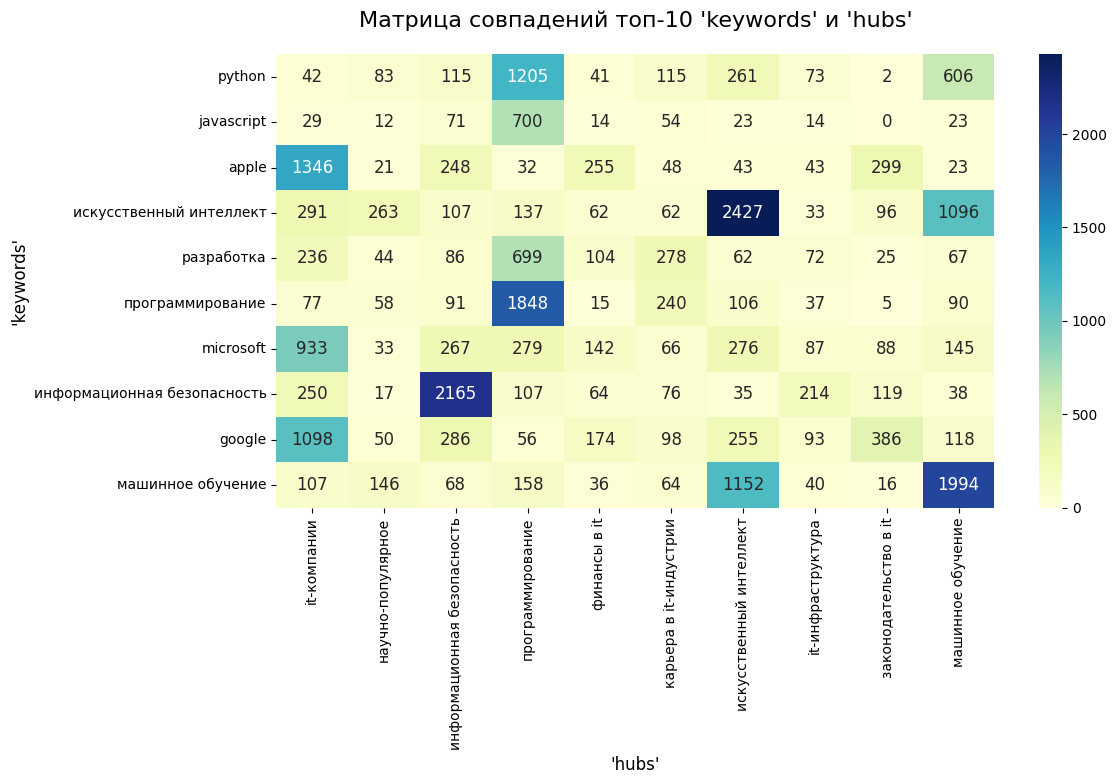

In [ ]:
def plot_top_keywords_hubs(isec, top_n=10):
    all_keywords = []
    all_hubs = []

    for _, row in isec.iterrows():
        keywords = get_clean(row["keywords"])
        hubs = get_clean(row["hubs"])
        all_keywords.extend(keywords)
        all_hubs.extend(hubs)

    keyword_counts = Counter(all_keywords)
    hub_counts = Counter(all_hubs)

    top_keywords = [k for k, _ in keyword_counts.most_common(top_n)]
    top_hubs = [h for h, _ in hub_counts.most_common(top_n)]

    co_matrix = pd.DataFrame(0, index=top_keywords, columns=top_hubs)

    for _, row in isec.iterrows():
        keywords_set = get_clean(row["keywords"])
        hubs_set = get_clean(row["hubs"])
        for keyword in keywords_set:
            for hub in hubs_set:
                if keyword in top_keywords and hub in top_hubs:
                    co_matrix.loc[keyword, hub] += 1

    plt.figure(figsize=FIG_SIZE_MEDIUM)
    sns.heatmap(co_matrix, annot=True, fmt='d', cmap=CMAP)
    plt.title(f"Матрица совпадений топ-{top_n} 'keywords' и 'hubs'", fontsize=FONT_SIZE_TITLE, pad=20)
    plt.xlabel("'hubs'", fontsize=FONT_SIZE_AXES)
    plt.ylabel("'keywords'", fontsize=FONT_SIZE_AXES)
    plt.tight_layout()
    plt.show()

plot_top_keywords_hubs(isec)

# Посмотрим на текст и время чтения

In [ ]:
clean_lens = cleaned
for i in ["text_len", "hubs_len", "keywords_len", "title_len"]:
  clean_lens[i] = cleaned[i[:-4]].fillna("").apply(len)

In [ ]:
clean_lens

,id,text,keywords,hubs,username,reading_time,title,time,year,text_len,hubs_len,keywords_len,title_len
0,390007,12 марта 2014 года на Kickstarter стартовала к...,"[даджет, даджеты, kickstarter, bluetooth, ламп...","[Блог компании Даджет, Гаджеты]",RubyFOX,6,Удачный проект с площадки Kickstarter – лампа ...,2016-02-16 06:44:56,2016,9257,2,7,79
1,390011,Автопроизводитель Porscheобъявил об окончании ...,"[Porsche, Mission E]","[Энергия и элементы питания, Транспорт, Экология]",SLY_G,1,Porsche построила первую электросолнечную коло...,2016-02-05 19:04:20,2016,1303,3,2,56
2,390013,Медики из Бостонского детского госпиталясмогли...,"[данио-рерио, рак, раковая опухоль, поля канце...",[Научно-популярное],SLY_G,2,С чего начинается рак: медики проследили разви...,2016-02-05 20:04:21,2016,2831,1,4,80
3,390017,Вышедшие кнедавнему 15-летию Википедиистатьи б...,"[википедия, нетривиальные бизнесы, свободное з...","[Научно-популярное, Краудсорсинг, Социальные с...",ssneg,2,"5 фактов о Википедии, которых вы не знали. Тре...",2016-02-05 08:18:09,2016,3196,4,4,90
4,390019,Генетики из исследовательской компании 23andMe...,"[совы, жаворонки, распорядок дня, циркадные ри...","[Научно-популярное, Здоровье]",SLY_G,2,"Учёные нашли гены, заставляющие нас делиться н...",2016-02-05 21:42:36,2016,2236,2,4,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151899,789998,Разработчик бесплатного проекта Nitter с откры...,"[twitter, nitter, front-end, open source, соцс...","[Open source, Управление проектами, Социальные...",maybe_elf,1,Автор Nitter объявил о закрытии проекта из-за ...,2024-01-30 06:57:47,2024,757,3,9,91
151900,790000,Авторы коллективного иска против образовательн...,"[geekbrains, образовательные курсы, иски, суды...","[Учебный процесс в IT, Законодательство в IT]",maybe_elf,2,Клиенты платформы GeekBrains добились возврата...,2024-01-30 07:17:01,2024,2303,2,9,78
151901,790002,Нарастание угроз утечки информации требует при...,"[dlp-системы, информационная безопасность, кон...",[Информационная безопасность],Golub,17,20 DLP-систем для информационной защиты компан...,2024-01-30 07:10:09,2024,24664,1,4,55
151902,790004,"Глава Neuralink Илон Маскзаявил, что компания ...","[neuralink, нейроинтерфейс, мозг, мозг-компьют...","[Биотехнологии, Мозг, Здоровье, Будущее здесь]",maybe_elf,1,Neuralink впервые вживила нейрочип в мозг чело...,2024-01-30 07:27:07,2024,1380,4,8,57


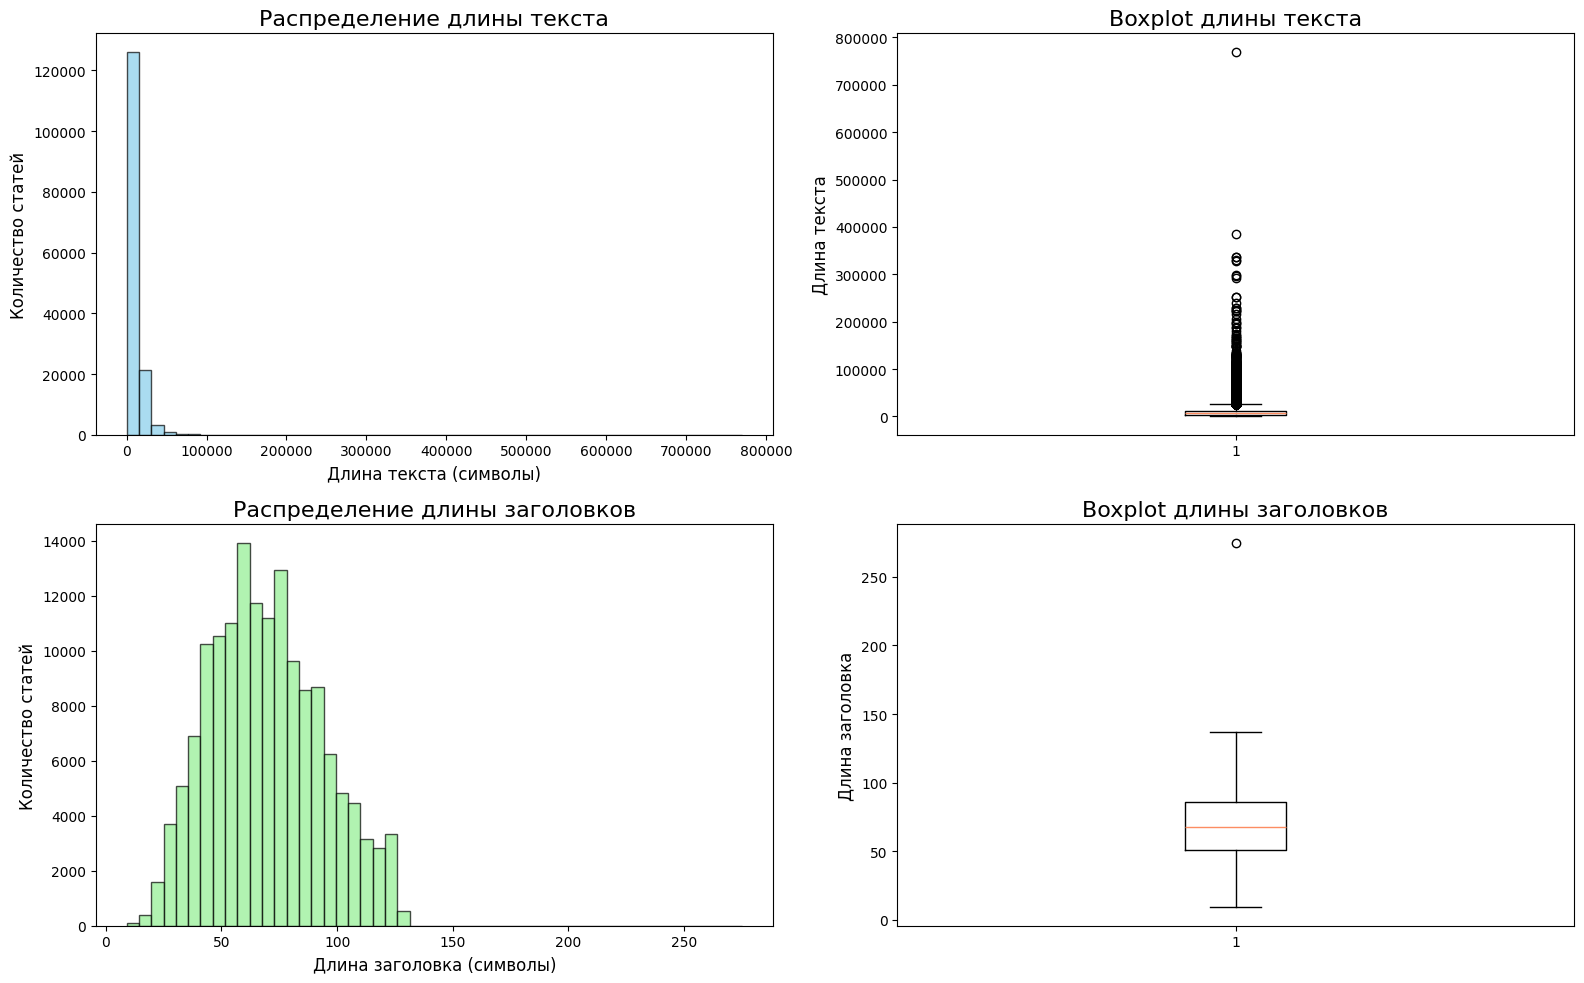

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=FIG_SIZE_LARGE)

axes[0, 0].hist(clean_lens['text_len'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение длины текста')
axes[0, 0].set_xlabel('Длина текста (символы)')
axes[0, 0].set_ylabel('Количество статей')

axes[0, 1].boxplot(clean_lens['text_len'])
axes[0, 1].set_title('Boxplot длины текста')
axes[0, 1].set_ylabel('Длина текста')

axes[1, 0].hist(clean_lens['title_len'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Распределение длины заголовков')
axes[1, 0].set_xlabel('Длина заголовка (символы)')
axes[1, 0].set_ylabel('Количество статей')

axes[1, 1].boxplot(clean_lens['title_len'])
axes[1, 1].set_title('Boxplot длины заголовков')
axes[1, 1].set_ylabel('Длина заголовка')

plt.tight_layout()
plt.show()


Посмотрим на распределение числовых переменных:

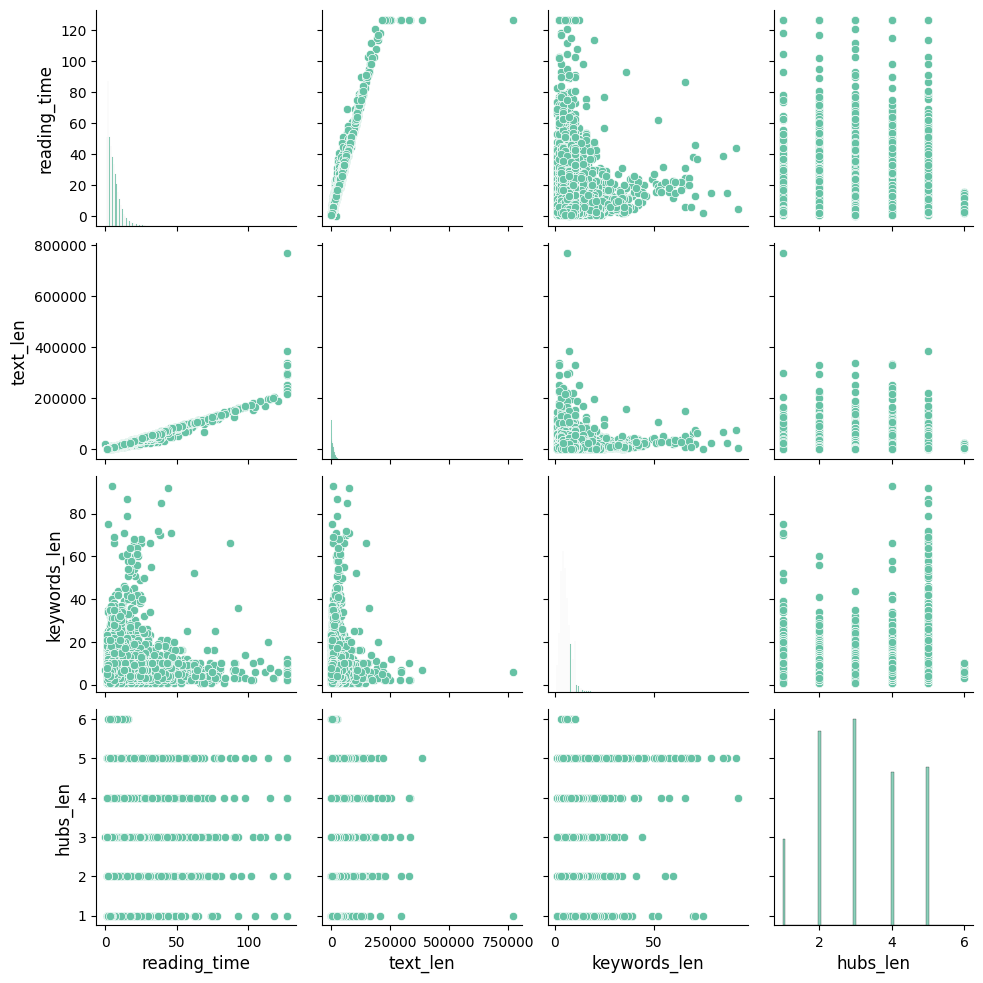

In [ ]:
sns.pairplot(clean_lens[['reading_time', 'text_len', 'keywords_len', 'hubs_len']])
plt.show()

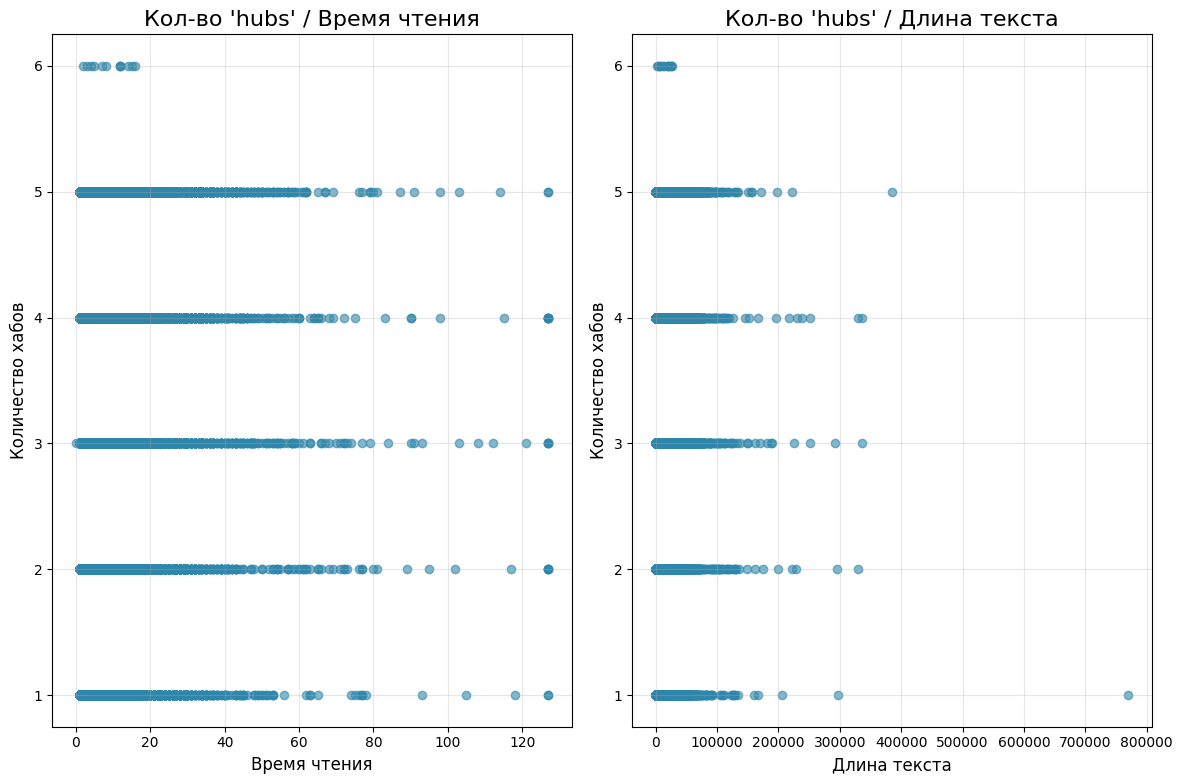

In [ ]:
def analyze_hubs_dependencies(cleaned):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=FIG_SIZE_MEDIUM)

    ax1.scatter(cleaned["reading_time"], cleaned["hubs_len"], alpha=0.6, color=PRIMARY_COLOR)
    ax1.set_xlabel("Время чтения", fontsize=FONT_SIZE_AXES)
    ax1.set_ylabel("Количество хабов", fontsize=FONT_SIZE_AXES)
    ax1.set_title("Кол-во 'hubs' / Время чтения", fontsize=FONT_SIZE_TITLE)
    ax1.grid(True, alpha=GRID_ALPHA)

    ax2.scatter(cleaned["text_len"], cleaned["hubs_len"], alpha=0.6, color=PRIMARY_COLOR)
    ax2.set_xlabel("Длина текста", fontsize=FONT_SIZE_AXES)
    ax2.set_ylabel("Количество хабов", fontsize=FONT_SIZE_AXES)
    ax2.set_title("Кол-во 'hubs' / Длина текста", fontsize=FONT_SIZE_TITLE)
    ax2.grid(True, alpha=GRID_ALPHA)

    plt.tight_layout()
    plt.show()


analyze_hubs_dependencies(cleaned)

# Анализ 'users'

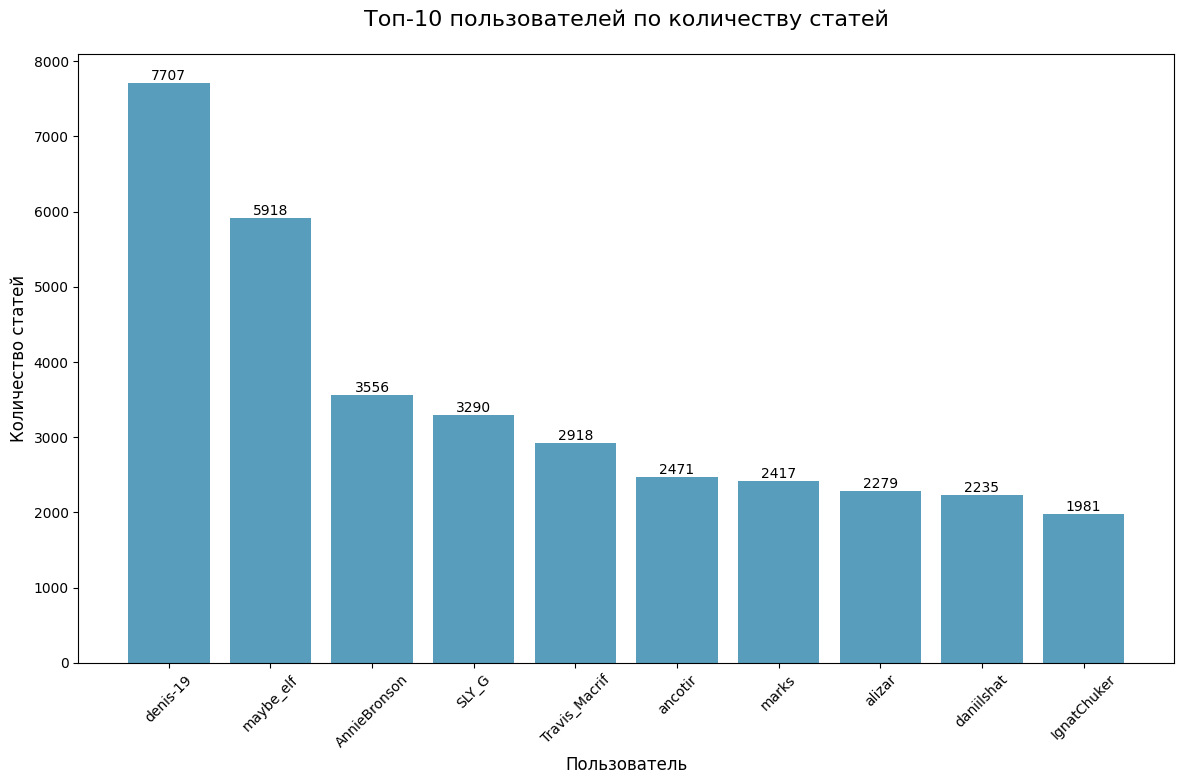

In [ ]:
def plot_top_users_articles(cleaned):
    user_articles = cleaned["username"].value_counts().head(10)

    fig, ax = plt.subplots(figsize=FIG_SIZE_MEDIUM)

    bars = ax.bar(range(len(user_articles)), user_articles.values, color=PRIMARY_COLOR, alpha=0.8)

    ax.set_xlabel("Пользователь", fontsize=FONT_SIZE_AXES)
    ax.set_ylabel("Количество статей", fontsize=FONT_SIZE_AXES)
    ax.set_title("Топ-10 пользователей по количеству статей", fontsize=FONT_SIZE_TITLE, pad=20)

    ax.set_xticks(range(len(user_articles)))
    ax.set_xticklabels(user_articles.index, rotation=45, fontsize=FONT_SIZE_TICKS)

    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f"{int(height)}", ha="center", va="bottom",
               fontsize=FONT_SIZE_TICKS)

    plt.tight_layout()
    plt.show()

plot_top_users_articles(cleaned)

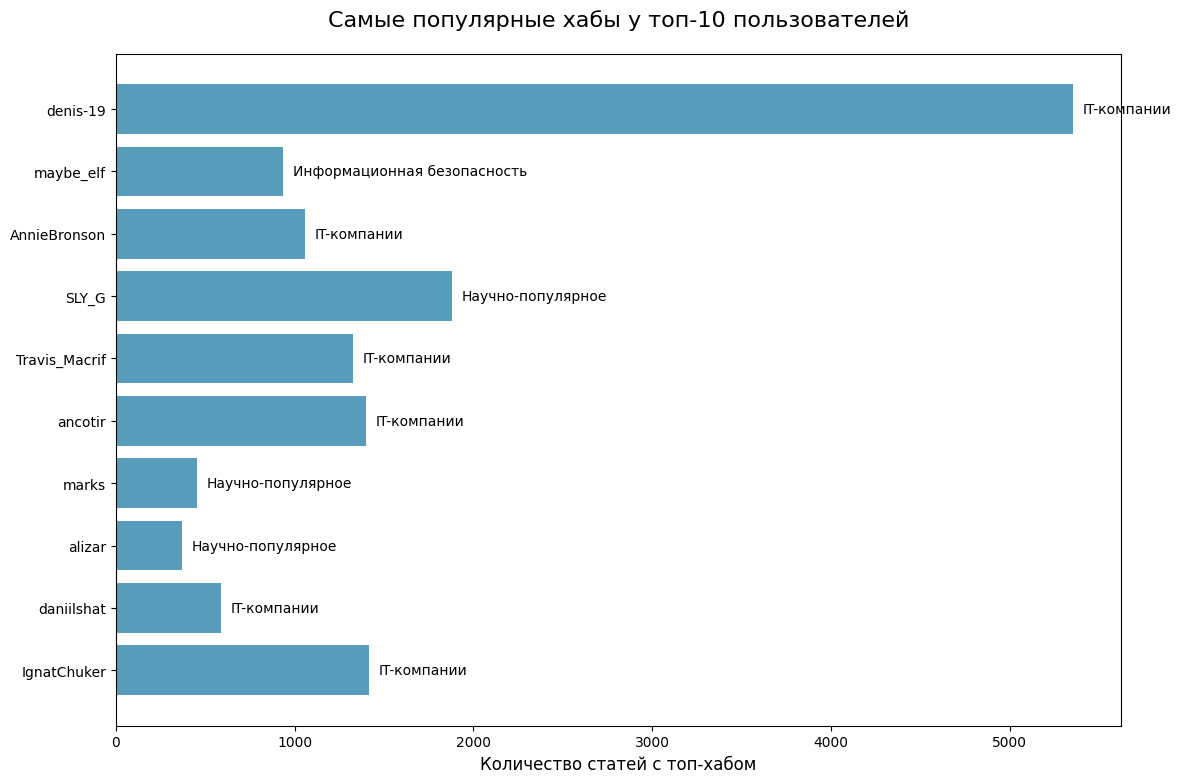

In [ ]:
def plot_user_hub_preferences(cleaned):
    user_hub_freq = {}

    for _, row in cleaned.iterrows():
        user = row["username"]
        hubs = row["hubs"]
        if user not in user_hub_freq:
            user_hub_freq[user] = Counter()
        user_hub_freq[user].update(hubs)

    top_users = cleaned["username"].value_counts().head(10).index

    all_top_hubs = []
    for user in top_users:
        if user in user_hub_freq:
            top_hub = user_hub_freq[user].most_common(1)[0]
            all_top_hubs.append((user, top_hub[0], top_hub[1]))

    users = [x[0] for x in all_top_hubs]
    hubs = [x[1] for x in all_top_hubs]
    counts = [x[2] for x in all_top_hubs]

    fig, ax = plt.subplots(figsize=FIG_SIZE_MEDIUM)

    y_pos = np.arange(len(users))
    bars = ax.barh(y_pos, counts, color=PRIMARY_COLOR, alpha=0.8)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(users, fontsize=FONT_SIZE_TICKS)
    ax.set_xlabel("Количество статей с топ-хабом", fontsize=FONT_SIZE_AXES)
    ax.set_title("Самые популярные хабы у топ-10 пользователей", fontsize=FONT_SIZE_TITLE, pad=20)

    for i, (bar, hub) in enumerate(zip(bars, hubs)):
        width = bar.get_width()
        ax.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                f"{hub}", ha="left", va="center", fontsize=FONT_SIZE_TICKS)

    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_user_hub_preferences(cleaned)

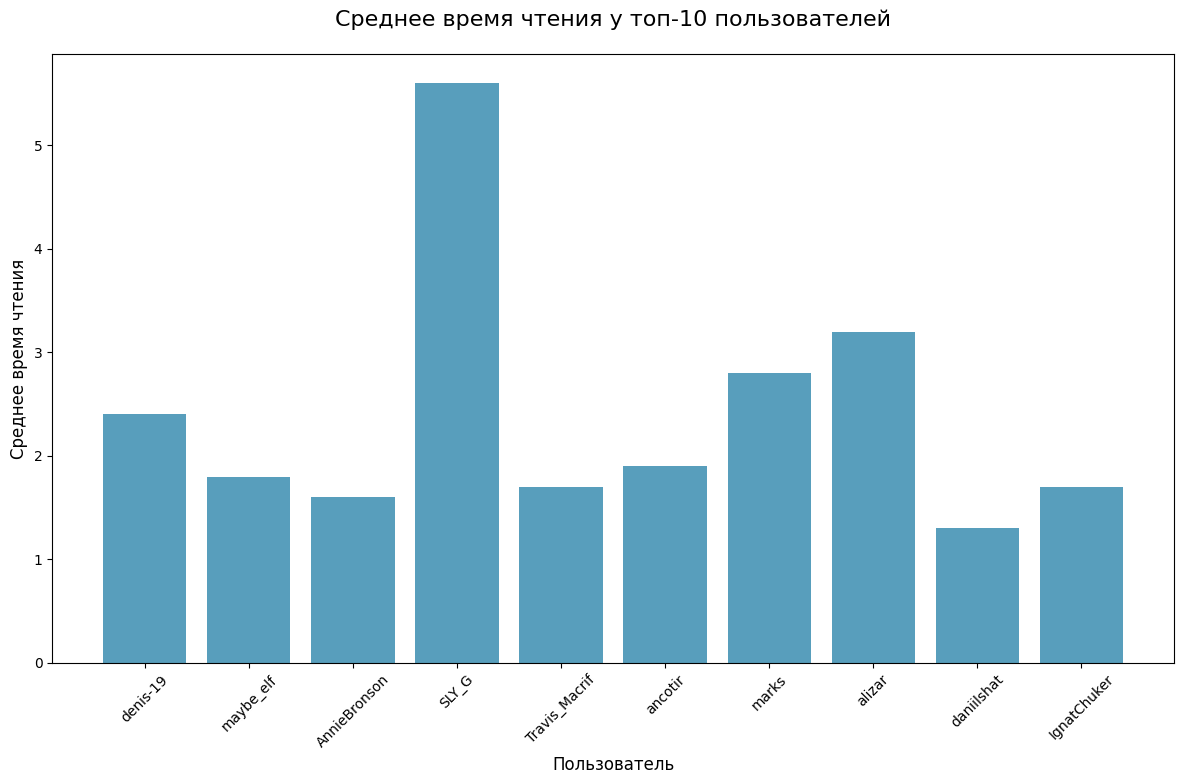

In [ ]:
def plot_user_reading_times(cleaned):
    user_stats = cleaned.groupby("username").agg({
        "reading_time": "mean",
        "id": "count"
    }).round(1)

    user_stats = user_stats.nlargest(10, "id")

    fig, ax = plt.subplots(figsize=FIG_SIZE_MEDIUM)

    bars = ax.bar(range(len(user_stats)), user_stats["reading_time"], color=PRIMARY_COLOR, alpha=0.8)

    ax.set_xlabel("Пользователь", fontsize=FONT_SIZE_AXES)
    ax.set_ylabel("Среднее время чтения", fontsize=FONT_SIZE_AXES)
    ax.set_title("Среднее время чтения у топ-10 пользователей", fontsize=FONT_SIZE_TITLE, pad=20)

    ax.set_xticks(range(len(user_stats)))
    ax.set_xticklabels(user_stats.index, rotation=45, fontsize=FONT_SIZE_TICKS)


    plt.tight_layout()
    plt.show()

plot_user_reading_times(cleaned)

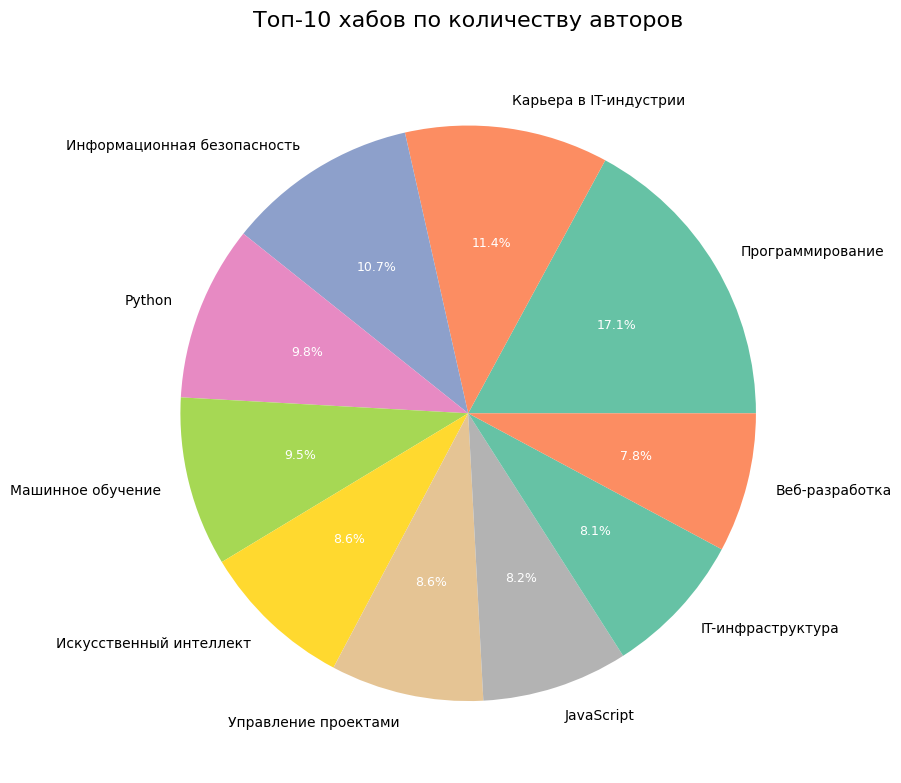

In [ ]:
def plot_hub_users_pie(cleaned):
    hub_users = {}

    for _, row in cleaned.iterrows():
        user = row["username"]
        hubs = row["hubs"]
        for hub in hubs:
            if hub not in hub_users:
                hub_users[hub] = set()
            hub_users[hub].add(user)

    hub_user_counts = {hub: len(users) for hub, users in hub_users.items()}
    top_hubs = dict(sorted(hub_user_counts.items(), key=lambda x: x[1], reverse=True)[:10])

    fig, ax = plt.subplots(figsize=FIG_SIZE_MEDIUM)

    wedges, texts, autotexts = ax.pie(top_hubs.values(), labels=top_hubs.keys(),
                                     autopct='%1.1f%%', textprops={'fontsize': FONT_SIZE_TICKS})

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(FONT_SIZE_TICKS-1)

    ax.set_title("Топ-10 хабов по количеству авторов", fontsize=FONT_SIZE_TITLE, pad=20)

    plt.tight_layout()
    plt.show()

plot_hub_users_pie(cleaned)

# Общее


Матрица корреляций:
                    id  reading_time      year  text_len  hubs_len  \
id            1.000000     -0.057797  0.957341 -0.062760  0.025094   
reading_time -0.057797      1.000000 -0.038239  0.982748  0.162706   
year          0.957341     -0.038239  1.000000 -0.043953  0.050895   
text_len     -0.062760      0.982748 -0.043953  1.000000  0.157557   
hubs_len      0.025094      0.162706  0.050895  0.157557  1.000000   
keywords_len  0.119419      0.089672  0.117057  0.087166  0.273473   
title_len     0.122661     -0.129237  0.111771 -0.126488  0.071917   

              keywords_len  title_len  
id                0.119419   0.122661  
reading_time      0.089672  -0.129237  
year              0.117057   0.111771  
text_len          0.087166  -0.126488  
hubs_len          0.273473   0.071917  
keywords_len      1.000000   0.103227  
title_len         0.103227   1.000000  


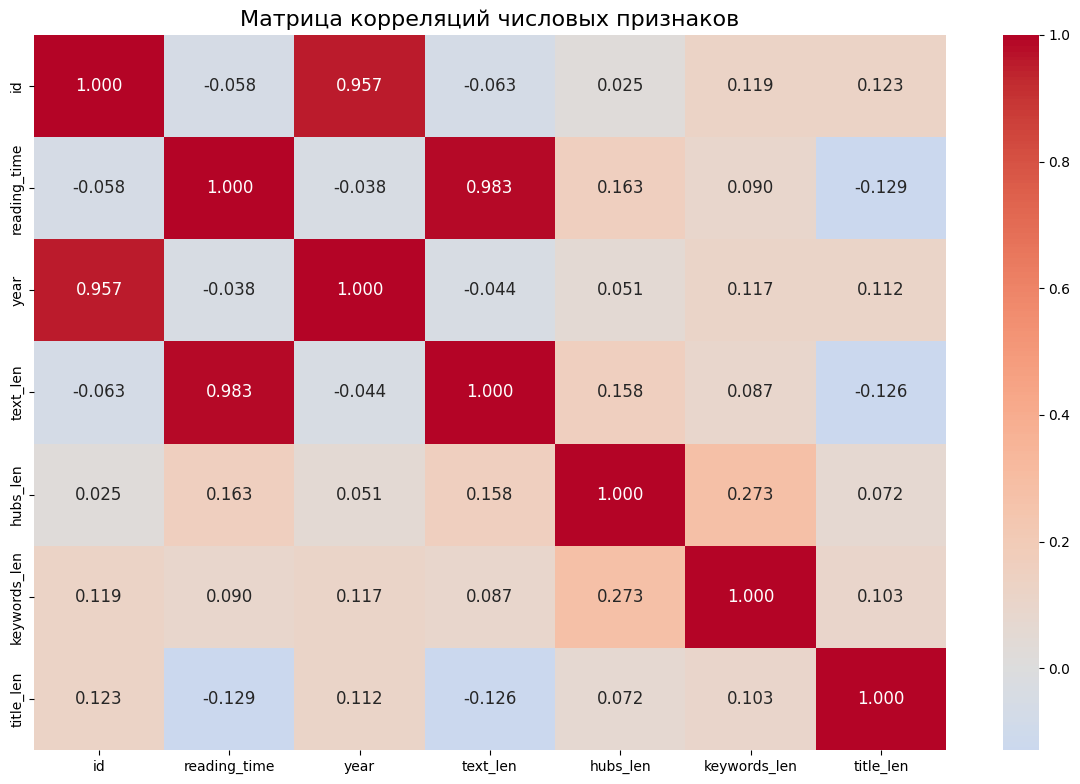

In [ ]:
numeric_columns = clean_lens.select_dtypes(include=[np.number]).columns

correlation_matrix = clean_lens[numeric_columns].corr()
print("\nМатрица корреляций:")
print(correlation_matrix)

plt.figure(figsize=FIG_SIZE_MEDIUM)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

# Выводы

Выбросов и нулей в данных мало - мы парсили сами и предварительно обработали текст, дубликатов нет. В ноутбуке привели поля датафрейма к правильным типам для экономии памяти и удобства работы.

Данные охватывают период с 2016 по 2024 год и содержат около 150k статей. Из 25 тысяч авторов всего один пользователь (denis-19) написал 5% всех статей, если посмотреть на его профиль — большинство статей это новости на какие-то научпоп темы. Одни из самых популярных тематик — опять же общие-научпоп темы, по типу it-компаний и информационной безопасности. Из «инструментов» в хабах в основном популярен только Python. Самые непопулярные статьи с хабами типа «блог компании Рога и Копыта». Судя по всему какие-то компании пытались повысить свою популярность, но написали только несколько статей и забили. Статьи публиковались в рабочее время суток по UTC+3, что логично, так как сайт русскоязычный.

Прослеживаются четкие зависимости между различными параметрами статей. Время чтения закономерно коррелирует с длиной текста, однако обнаружены аномалии — некоторые короткие статьи имеют непропорционально большое время чтения, что может указывать на сложный технический контент. Также наблюдается авторская специализация — активные авторы обычно фокусируются на определенных тематиках.
